Basé sur la démarche expérimentale du TP2 A5, plusieurs tests ont été effecutés afin de mesurer la "propriété rebondissante" d'une pile déchargée. \
Afin de pouvoir tester la validité, faisaibilité et la pertinence de la démarche dans le cas de notre problème, les tests suivant ont été mesurés en utilisant une calibration effectuée par le passé (re-calibration nécéssaire pour valider les mesures).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import curve_fit

import os
print(os.getcwd())

/home/IPT/IPT Lab Notebook/Kinetic_voltmeter/19-09-25


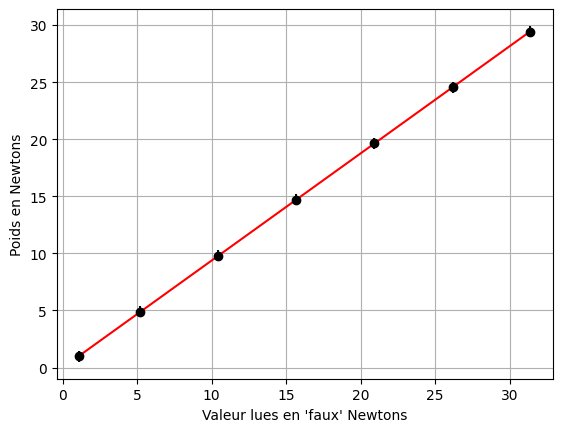

la pente est de 0.94+/0.02 et l'ordonnée à l'origine de -0.01+/-0.34


In [2]:
#Calibration :

filenames = ["100g.csv", "500g.csv", "1000g.csv", "1500g.csv", "2000g.csv", "2500g.csv", "3000g.csv"]
means = []
eonmeans = []
for f in filenames:
    #On prend une "tranche" des données (attention, ceci prend le premier index et exclu le dernier), de l'index 80 à l'index 100 (20 échantillons):
    data = pd.read_csv(f, names=["Time", "ChanSum"])
    tranche = data["ChanSum"][300000:500000].values
    #On peut prendre leur moyenne:
    means.append(tranche.mean())
    #print("la moyenne des 20 derniers échantillons:", mean)

    #L'erreur sur leur moyenne (= deviation standard divisée par racine carée du nombre d'échantillons):
    eonmeans.append(tranche.std()/m.sqrt( len(tranche) ) )
    #print("Incertitude sur la moyenne de 20 derniers échantillons:", eonmean )

#On met les valeur des poids utilisés dans un vecteur numpy (que vous avez mesurés avec la balance de précision):
poids_kg = np.array([0.1001,0.5003,1.0001,1.5005,2.0010, 2.5012, 3.0008])# les poids en kg, utiliser les valeurs de la balance

#On leur donne tous la même incertitude, de la balance (hautement éxagérée ici!)
poids_kg_incert = 0.05 * np.ones(poids_kg.shape[0]) #on en fait un vecteur

#On multiplie les valeurs par g, pour avoir des Newtons
poids_N = 9.81 * poids_kg
poids_N_incert = 9.81 * poids_kg_incert

#On utilise ici les valeurs que vous avez déduites des mesures d'étalonnage
valeur_lues = np.array(means) # les moyennes, utiliser vos valeurs
valeur_lues_incert = np.array(eonmeans) # les incertitudes sur les moyennes

#On définit la fonction à utiliser pour le fit (une fonction linéaire)
def fit_fcn(x, a, b):
    return a*x + b

#Étant donné qu'on veut connaître les facteur pour convertir des valeur lues en "vrais" Newton,
#on va mettre les valeurs lues sur l'axe des X (même si ce sont des valeurs qu'on a mesurées, et
#que les poids correspondent plutôt à des valeurs qu'on a contrôlées)
#Attention, en faisant ceci on n'utilise en fait plus les incertitudes sur les valeur lues,
#qui ne sont pas prises en compte dans le fit (qui ne considére que les incertitudes en y)

#On fait le fit pour trouver la pente et l'intercept
fit_pars, fit_cov = curve_fit(fit_fcn, #la fonction
                       xdata = valeur_lues, #les valeurs x
                       ydata = poids_N, #les valeur y
                       sigma = poids_N_incert, #incertitudes en y 
                       absolute_sigma = True #nécessaire pour que les incertitudes soient prises en compte
                      )

#On extrait la pente et l'intercepte (ordonnée à l'origine) du fit
pente = fit_pars[0] #a est le premier paramètre de la fonction de fit
intercept = fit_pars[1] #b est le deuxième

#ainsi que leur incertitude (qui proviennent de la diagonale de la matrice de covariance du fit)
pente_incert = m.sqrt(fit_cov[0][0])
intercept_incert = m.sqrt(fit_cov[1][1])

#Et on finit avec un graph pour visualiser:

#la fonction de fit:
xfits = np.linspace(min(valeur_lues), max(valeur_lues), 100)
yfits = pente*xfits+intercept
plt.plot(xfits, yfits, '-', color='red')
#les données (points avec incertitudes, donc errorbar au lieu de plot)
plt.errorbar(x=valeur_lues, xerr=valeur_lues_incert, y=poids_N, yerr=poids_N_incert, fmt='o', color='black')
#les informations:
plt.xlabel("Valeur lues en 'faux' Newtons")
plt.ylabel("Poids en Newtons")
plt.grid()
plt.show()


print("la pente est de {:.2f}+/{:.2f} et l'ordonnée à l'origine de {:.2f}+/-{:.2f}".format(pente,pente_incert,intercept,intercept_incert))




In [3]:
def AppliquerEtalonnageLineaire(valeur_capteur):
    #vous pouvez, bien entendu, remplacer pente et intercept par des valeur numériques
    return pente*valeur_capteur + intercept

In [1]:
#test pile AA 1

filename = "AA2.csv" #à modifier
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)

#Regardons les valeur lues et étalonées
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim([0, 80000])
plt.grid()
plt.show()

NameError: name 'pd' is not defined

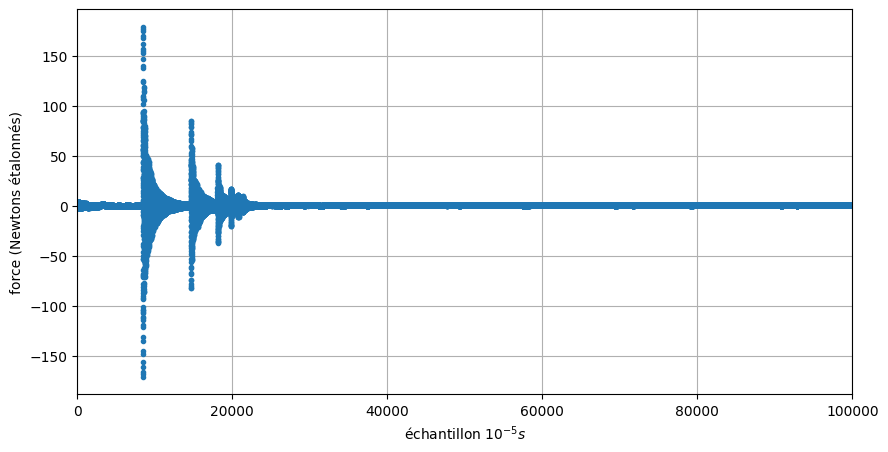

In [8]:
#test pile AA 2

filename = "testAA2.csv" #à modifier
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5)) #changer la taille de la figure, longeur, hauteur

#N'oublions pas d'étalonner:
somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)

#Regardons les valeur lues et étalonées
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$") #on peut mettre du Latex dans les légendes...
plt.xlim([0, 100000])
plt.grid()
plt.show()

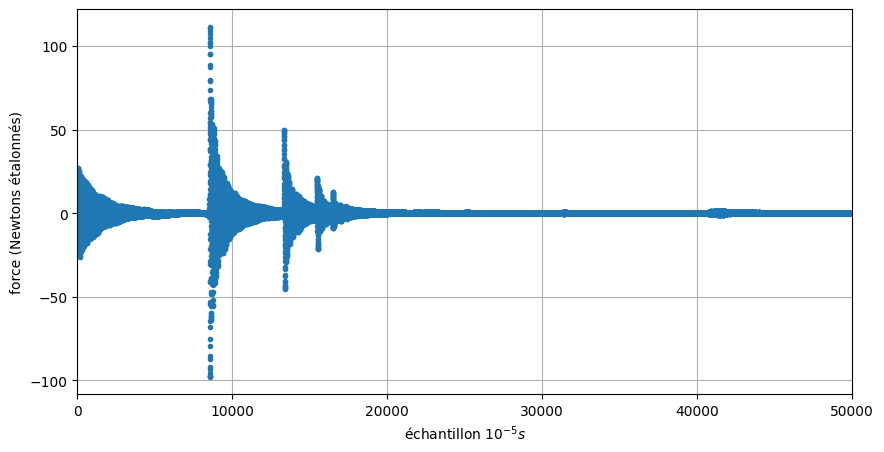

In [9]:
#test pile AA 3

filename = "testAA3.csv" #à modifier
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5)) #changer la taille de la figure, longeur, hauteur

#N'oublions pas d'étalonner:
somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)

#Regardons les valeur lues et étalonées
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$") #on peut mettre du Latex dans les légendes...
plt.xlim([0, 50000])
plt.grid()
plt.show()